In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# *k*-means clustering

*k*-means clustering is an algorithm that searches for a given number of clusters within some unlabeled multidimensional dataset. 
The optimal clustering is found as follow: 
- The "cluster centre" is the arithmetic mean of all of the points belonging to the cluster.
- Each point is closer to its own cluster centre than other cluster centres. 

These assumptions are the basis for the *k*-means algorithm, which is implemented with an expectation-maximisation (E-M) approach. 
The E-M approach consists of the following procedure: 
1. Guess some cluster centres
2. Repeat the following to convergence: 
    1. E-step: assign points to the nearest cluster centre
    2. M-step: set the cluster centres to the mean
    
The E-step updates our expectation of which cluster each point belongs to, while the M-step maximises some fitness function that defines the cluster centre locations. 
In the case of *k*-means, the maximisation is achieved by taking a simple mean of the data in each cluster. 
Each repatition will always result in a better estimate of the cluster characteristics. 

The *k*-means algorithm is simple enough that it can be written with just a few handfulls of lines of code, see the example below from the work of VanderPlas {cite}`vanderplas_python_2016`.

In [2]:
def find_clusters(X, n_clusters):
    # 1. Guess some cluster centres
    i = np.random.permutation(X.shape[0])[:n_clusters]
    centres = X[i]
    
    while True:
        # 2A. Assign points to the nearest cluster centre
        labels = pairwise_distances_argmin(X, centres)
        
        # 2B. Set the cluster centres to the mean
        new_centres = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Check convergence
        if np.all(centres == new_centres):
            break
        centres = new_centres
    
    return centres, labels

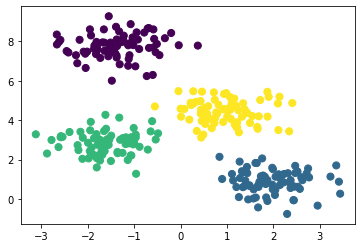

In [3]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
centres, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)
plt.show()

There are some important issues that we need to be aware of when using a simple E-M algorithm:
- The globally optimal result may not be achieved: As is the case with all optimisations, although the result is improving, it may not be moving towards to global optimium solution.
- The number of clusters must be selected beforehand: It is necessary that we have some *a priori* knowledge about our dataset to effectively apply a *k*-means clustering, as we must now at the beginning how many clusters we expect to find. 
- *k*-means is limited to linear cluster boundaries: The fact that k-means is finding samples as close as possible in cartesian space means that the clusters cannot have more complex geometries. 
- *k*-means can be slow for large numbers of samples: Each iteration must access every point in the dataset, this means that this algorithm can be slow for very large datasets. 

Let's quickly see the how to leverage the *k*-means algorithm  in `scikit-learn` before we move on to a more complex method. 

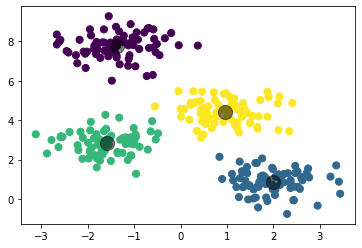

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], s=50, c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='k', alpha=0.5)
plt.show()